In [1]:
import xarray
import numpy as np
import pandas as pd
import matplotlib as mpl

import matplotlib.pyplot as plt  # plotting library

# Issue: Maybe downgrade shapely pip install shapely==1.8.5
import cartopy.crs as ccrs  # Projections list
import cartopy.feature as cfeature # for coastlines

# ToDo

Currentl we are only inspecting gmb data

## Inspect gmb data

In [6]:
# costg is until 2023
gmb = xarray.open_dataset(
    "/home/kim/mass_balance_ConvNP/data/GRACE_COST-G/GRAVIS-3_2002095-2023334_COSTG_0100_AIS_GRID_TUD_0003.nc")

# need full path because file is in archive
gmb.dm.values.shape

(227, 97, 117)

# Time spacing

- some deviations from mid-month indexing

In [16]:
gmb.time.values

array(['2002-04-18T00:00:00.000000000', '2002-05-10T00:00:00.000000000',
       '2002-08-16T12:00:00.000000000', '2002-09-16T00:00:00.000000000',
       '2002-10-16T12:00:00.000000000', '2002-11-16T00:00:00.000000000',
       '2002-12-16T12:00:00.000000000', '2003-01-16T12:00:00.000000000',
       '2003-02-15T00:00:00.000000000', '2003-03-16T12:00:00.000000000',
       '2003-04-16T00:00:00.000000000', '2003-05-11T12:00:00.000000000',
       '2003-07-16T12:00:00.000000000', '2003-08-16T12:00:00.000000000',
       '2003-09-16T00:00:00.000000000', '2003-10-16T12:00:00.000000000',
       '2003-11-16T00:00:00.000000000', '2003-12-16T12:00:00.000000000',
       '2004-01-07T12:00:00.000000000', '2004-02-17T00:00:00.000000000',
       '2004-03-16T12:00:00.000000000', '2004-04-16T00:00:00.000000000',
       '2004-05-16T12:00:00.000000000', '2004-06-16T00:00:00.000000000',
       '2004-07-16T12:00:00.000000000', '2004-08-16T12:00:00.000000000',
       '2004-09-16T00:00:00.000000000', '2004-10-16

In [8]:
gmb.area.values # m^2 
# Use are variable to convert to mass

array([[2.21750097e+09, 2.22507211e+09, 2.23254912e+09, ...,
        2.23254912e+09, 2.22507211e+09, 2.21750097e+09],
       [2.22375263e+09, 2.23135559e+09, 2.23886409e+09, ...,
        2.23886409e+09, 2.23135559e+09, 2.22375263e+09],
       [2.22989812e+09, 2.23753241e+09, 2.24507189e+09, ...,
        2.24507189e+09, 2.23753241e+09, 2.22989812e+09],
       ...,
       [2.22989812e+09, 2.23753241e+09, 2.24507189e+09, ...,
        2.24507189e+09, 2.23753241e+09, 2.22989812e+09],
       [2.22375263e+09, 2.23135559e+09, 2.23886409e+09, ...,
        2.23886409e+09, 2.23135559e+09, 2.22375263e+09],
       [2.21750097e+09, 2.22507211e+09, 2.23254912e+09, ...,
        2.23254912e+09, 2.22507211e+09, 2.21750097e+09]])

In [11]:
50000*50000
50*50

2500000000

Mean field from 2002-04 (first month in data set) to 2020-03 (index 182)

In [24]:
gmb.dm[0:182+1] # include 182 because it is 183 days
gmb.dm[0:182+1].mean()

<xarray.DataArray 'dm' ()> Size: 8B
array(0.66623851)

In [28]:
reference_field = gmb.dm[0:182+1].mean(dim = "time")

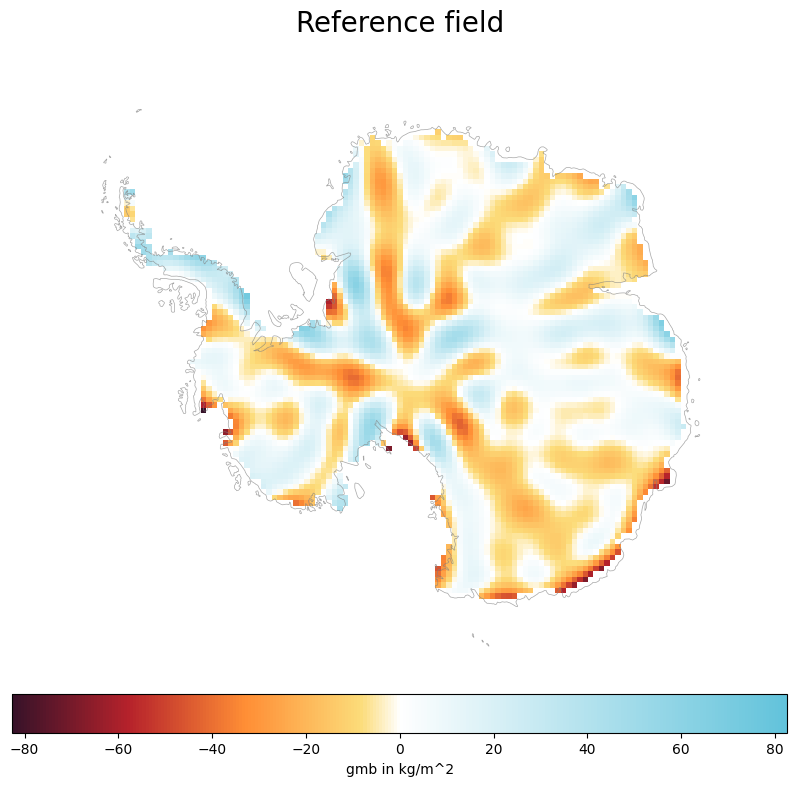

In [35]:
i = 194

nasa_cmap = mpl.colors.LinearSegmentedColormap.from_list("", tuples)

fig = plt.figure(figsize = [10, 10])
ax = plt.axes(projection = ccrs.SouthPolarStereo())

# define bounds
ax.set_extent([-3e6, 3e6, -3e6, 3e6], ccrs.SouthPolarStereo())

# hides boundry line
ax.axis('off')

special_color = 'grey'

# thin coastline lines
ax.add_feature(cfeature.COASTLINE, 
               edgecolor = special_color, 
               linestyle = '-', 
               linewidth = 0.5, 
               alpha = 0.7)

# ax.stock_img()

reference_field.plot(ax = ax, 
        transform = ccrs.SouthPolarStereo(), 
        # cmap = 'bwr_r',
        cmap = nasa_cmap,
        # remove colorbar
        add_colorbar = True,
        cbar_kwargs = dict(orientation = 'horizontal',
                      pad = 0.0, shrink = 1, label = 'gmb in kg/m^2')) 

plt.title("Reference field", size = 20)

plt.show()

## Define color map

In [30]:
cvals  = [0., 0.15, 0.3, 0.45, 0.5, 1.]
colors = ["#371229", "#B6222B", "#FF8E35", "#FCDC79", "white", "#62C3DB"]

norm = plt.Normalize(np.min(cvals), np.max(cvals))
tuples = list(zip(map(norm, cvals), colors))
nasa_cmap = mpl.colors.LinearSegmentedColormap.from_list("", tuples)

## Visualise data

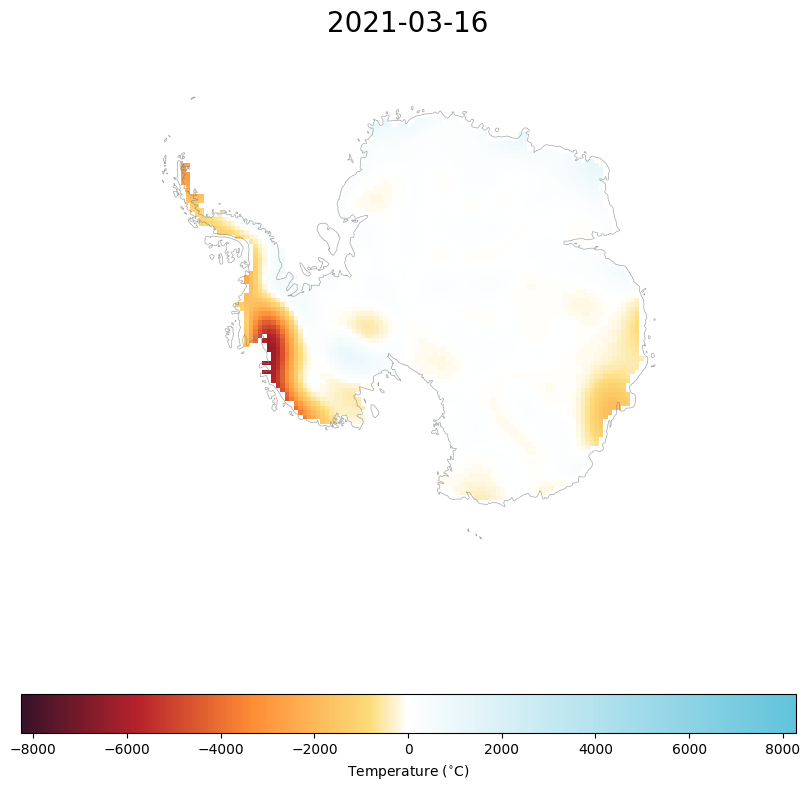

In [20]:
i = 194

nasa_cmap = mpl.colors.LinearSegmentedColormap.from_list("", tuples)

fig = plt.figure(figsize = [10, 10])
ax = plt.axes(projection = ccrs.SouthPolarStereo())

# define bounds
ax.set_extent([-3e6, 3e6, -3e6, 3e6], ccrs.SouthPolarStereo())

# hides boundry line
ax.axis('off')

special_color = 'grey'

# thin coastline lines
ax.add_feature(cfeature.COASTLINE, 
               edgecolor = special_color, 
               linestyle = '-', 
               linewidth = 0.5, 
               alpha = 0.7)

# ax.stock_img()

gmb.dm[i].plot(ax = ax, 
        transform = ccrs.SouthPolarStereo(), 
        vmin = np.nanmin(gmb.dm.values), 
        # define max as negative min to keep 0 white
        vmax = -np.nanmin(gmb.dm.values),
        # cmap = 'bwr_r',
        cmap = nasa_cmap,
        # remove colorbar
        add_colorbar = True,
        cbar_kwargs = dict(orientation = 'horizontal',
                      pad = 0.15, shrink = 1, label = 'Temperature ($^{\circ}$C)')) 

plt.title(str(gmb.dm[i].time.values)[0:10], size = 20)

plt.show()